In [2]:
import numpy as np 
import pandas as pd 
import librosa
from librosa import feature
import librosa.display
import matplotlib.pyplot as plt
import os
import keras
from keras.layers import *
from keras import metrics
from keras.utils import to_categorical
import sklearn
from sklearn.model_selection import train_test_split
import csv
import IPython.display as ipd
from keras.regularizers import l1, l2, l1_l2

plt.style.use('ggplot')


In [7]:
random_file_path = "./recordings/0_george_1.wav"

In [8]:
x, sr = librosa.load(random_file_path)
print(type(x), type(sr))


<class 'numpy.ndarray'> <class 'int'>


In [9]:
ipd.Audio(data=x, rate=sr)

### This is a quick feature analysis of a random file in our dataset, ```rock.00005.wav```. This is the raw ```.wav``` file.

In [10]:
ipd.Audio(random_file_path)


### This is a wave plot of the first example file.

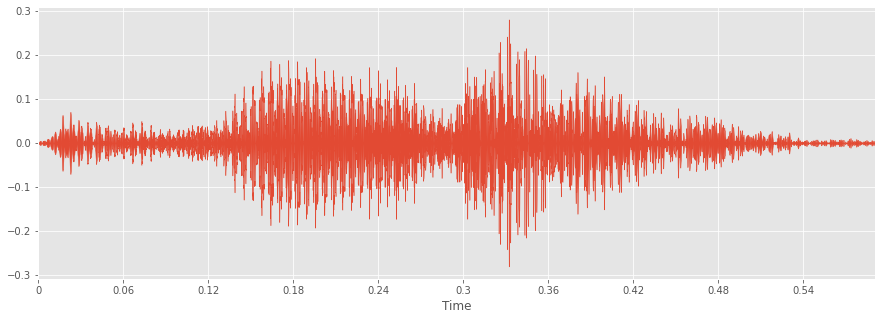

In [11]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sr)
plt.show()

### A chroma vector a a 12-element feature vector of the relative energy of each pitch class in the signal. The following plot is a chromagram of the first example file.

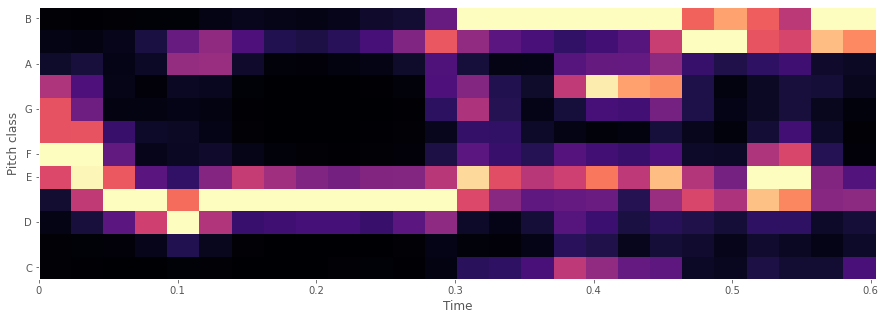

In [12]:
chromagram = librosa.feature.chroma_stft(x, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma')
plt.show()


The RMSE (root mean squared energy) of the signal, defined as

RMSE eqn to be put!

where x(n) is a time signal.

In [13]:
example_rmse = librosa.feature.rms(x)
print(example_rmse.shape)
print(np.mean(example_rmse))

(1, 26)
0.043413814


### The center of mass of the signal, e.g. the weighted mean of frequencies in the signal.

1033.264168014599


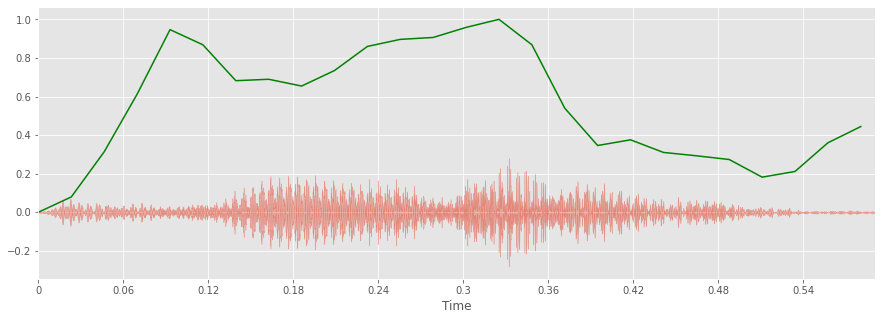

In [14]:
plt.figure(figsize=(15, 5))
example_spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
example_spectral_centroids.shape
frames = range(len(example_spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(example_spectral_centroids), color='g')
print(np.mean(example_spectral_centroids))


## Order p spectral bandwidth is defined as

Spectral bandwidth eqn to be put!

## where S(k) is the spectral magnitude at frequency bin k, f(k) is the frequency at frequency bin k, and fc is the spectral centroid.

969.392963860721


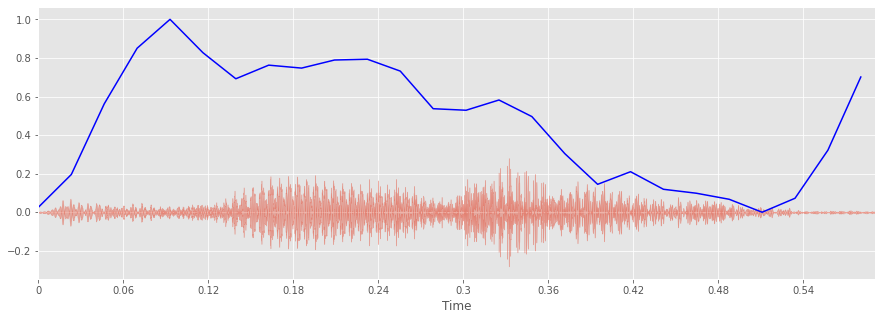

In [17]:
plt.figure(figsize=(15, 5))
example_spectral_bandwidth = librosa.feature.spectral_bandwidth(x, sr=sr)[0]
example_spectral_bandwidth.shape
frames = range(len(example_spectral_bandwidth))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(example_spectral_bandwidth), color='b')
print(np.mean(example_spectral_bandwidth))

### The spectral rolloff is a frequency below which a certain percentage of spectral energy lies.

2111.9103064903848


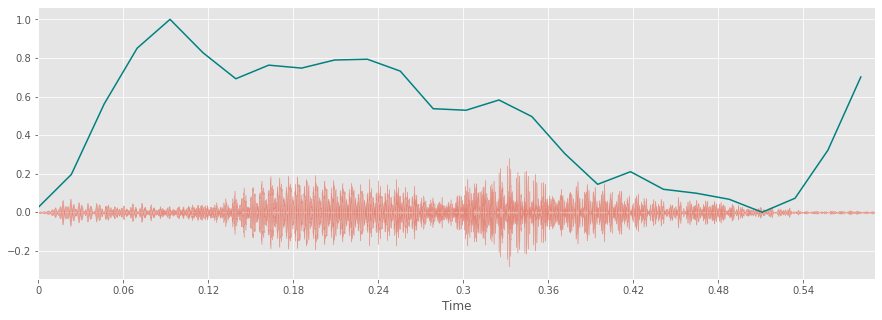

In [16]:
plt.figure(figsize=(15, 5))
example_spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
example_spectral_rolloff.shape
frames = range(len(example_spectral_rolloff))
t = librosa.frames_to_time(frames)
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(example_spectral_bandwidth), color='teal')
print(np.mean(example_spectral_rolloff))

### The zero crossing rate is the rate at which the signal changes sign (crosses y = 0).

4


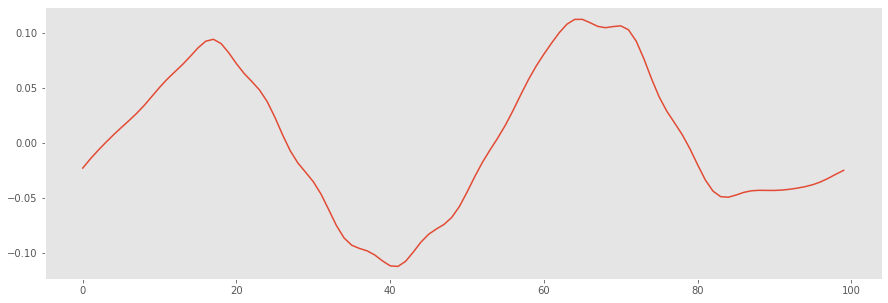

In [18]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(15, 5))
plt.plot(x[n0:n1])
plt.grid()
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

### The Mel-Frequency Cepstral Coefficients (MFCCs) are a set of features which describe the representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

(20, 26)
-25.658747


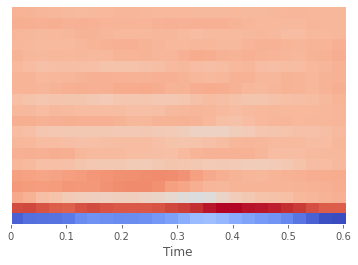

In [19]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
print(np.mean(mfccs))

## Normalizing MFCCs

/usr/local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


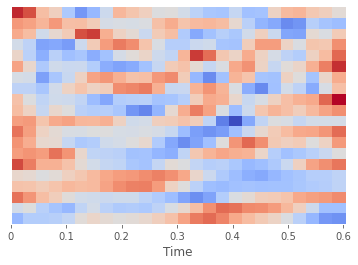

In [20]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
# print(mfccs.mean(axis=1))
# print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Features to choose : Chroma features, RMS, Spectral Centroid, Spectral Bandwidth, Spectral Rolloff, Zero Crossing Rate, MFCCs